# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





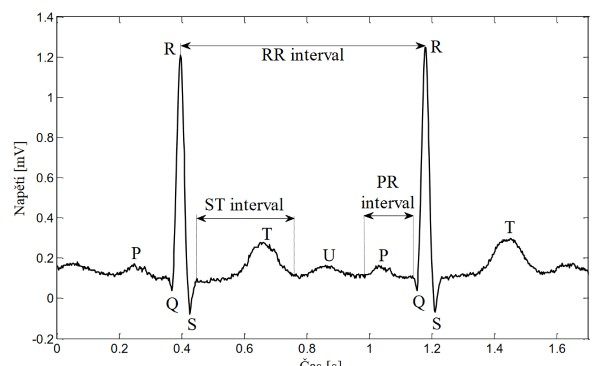

#### EKG ve spektru

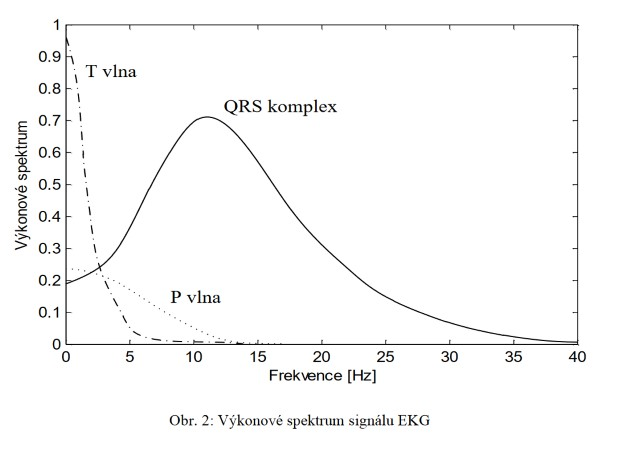

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [ ]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xdolak09.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xdolak09.wav")


--2023-12-17 20:55:38--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xdolak09.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xdolak09.wav.1’

xdolak09.wav.1      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-17 20:55:39 (136 MB/s) - ‘xdolak09.wav.1’ saved [10044/10044]

--2023-12-17 20:55:39--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.1’

FIB.wav.1           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-1

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

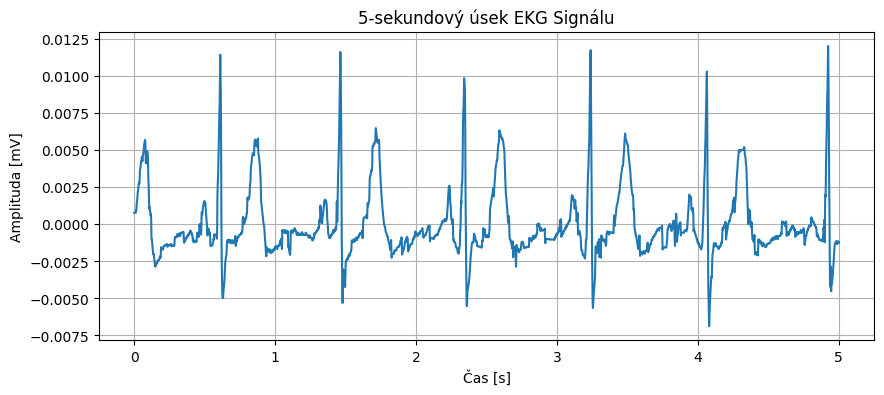

In [ ]:
# Zde napište váš kód
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

FinishTime = 5 # End of Signal That Will Be Processed 5s
LastSample  = FinishTime * fs # Last Sample With Discrete Time Fs * T
SelectedSignal = x[0:LastSample]

# Time Axis For Selected 5 Second Signal
time_axis = np.linspace(0,FinishTime, len(SelectedSignal))

# Plot of Signal
plt.figure(figsize=(10, 4))
plt.plot(time_axis, SelectedSignal)
plt.title("5-sekundový úsek EKG Signálu")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda [mV]")
plt.grid(True)
plt.show()


b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

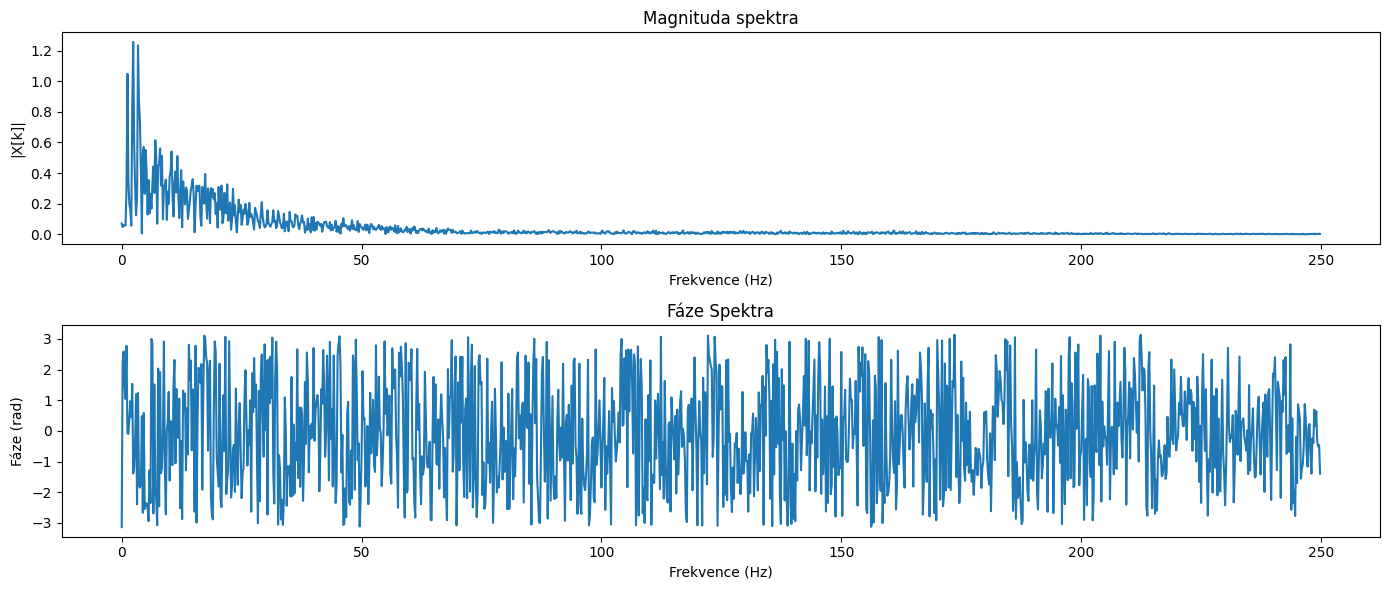

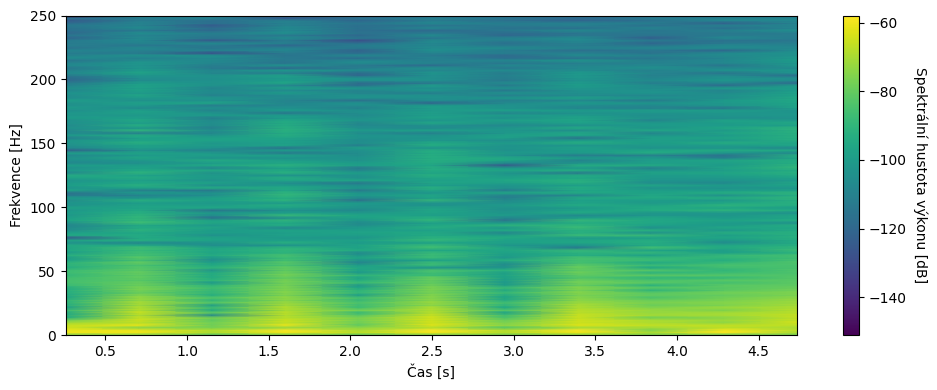

In [ ]:
# Zde napište váš kód
import numpy as np
from scipy.signal import spectrogram
from scipy.fft import fft, fftfreq

### View In Frequency Domain ###
SelectedSignalDFT = fft(SelectedSignal)

# Frequency corresponding to DFT bins
freqs = np.fft.fftfreq(len(SelectedSignal), 1 / fs)

# Calculation of magnitude and phase
magnitude = np.abs(SelectedSignalDFT)
phase = np.angle(SelectedSignalDFT)

# DFT calculation for half of the spectrum
half_index = len(SelectedSignal) // 2

# Rendering magnitude for half of the spectrum
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(freqs[:half_index], magnitude[:half_index])
plt.title('Magnituda spektra')
plt.xlabel('Frekvence (Hz)')
plt.ylabel("|X[k]|")

# Phase rendering for half of the spectrum
plt.subplot(2, 1, 2)
plt.plot(freqs[:half_index], phase[:half_index])
plt.title('Fáze Spektra')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Fáze (rad)')

plt.tight_layout()
plt.show()

# Compute The Spectrogram
f, t, sgr = spectrogram(SelectedSignal, fs)
# Logarithmic Scale For Better Visualization
sgr_log = 10 * np.log10(sgr + 1e-20)

# Plot Of Spectrogram
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, sgr_log, shading='gouraud')
plt.xlabel('Čas [s]')
plt.ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektrální hustota výkonu [dB]', rotation=270, labelpad=15)
plt.tight_layout()
plt.show()



 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Pravděpodobně způsobeno elektrickým rušením. A harmocnické frekvence jsou pouze násobky základní, ty se objevují vždy.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [ ]:
# Zde napište váš kód
from scipy.signal import butter, lfilter, resample

# Set Of Filters Parameters
nyquist_freq = fs / 2
cutoff_freq = 50  # 50 Hz - Nyquist Frequency For Sampling Frequency Of 100 Hz
order = 5         # Order of Filter

# Creation Of Anti-Aliasing Filter
b, a = butter(order, cutoff_freq / nyquist_freq)
# Aplication Of Anti-Aliasing Filter
filtered_signal = lfilter(b, a, x)

# Resample Of Origin Signal
fs_new = 100  # New Sample Frequency
ResampledSignal = resample(filtered_signal, int(len(x) * fs_new / fs))


b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

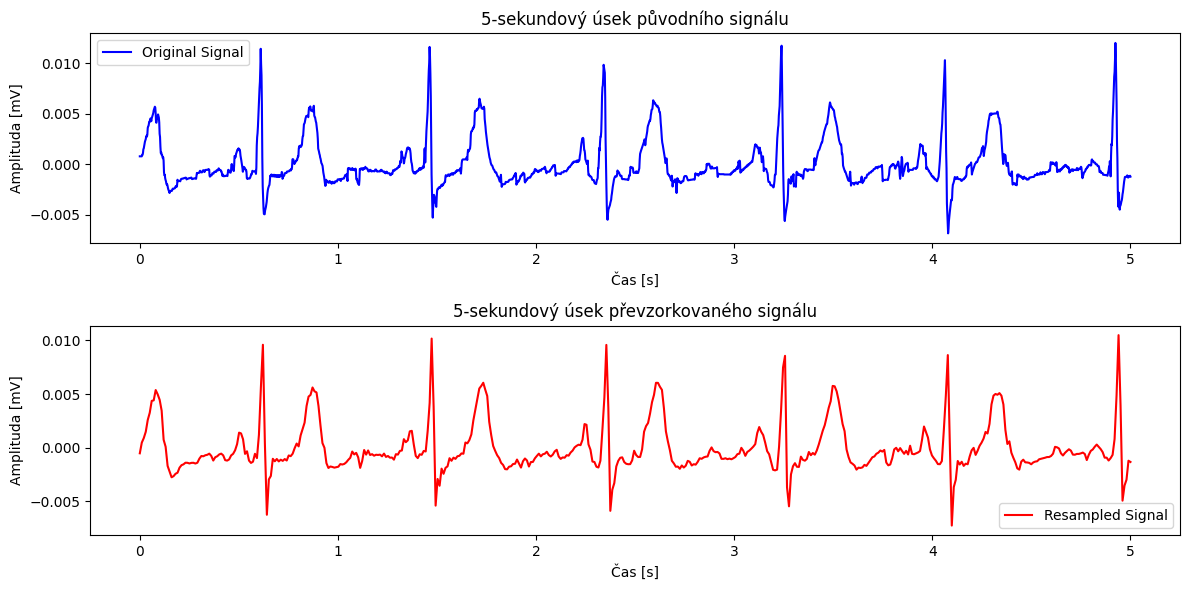

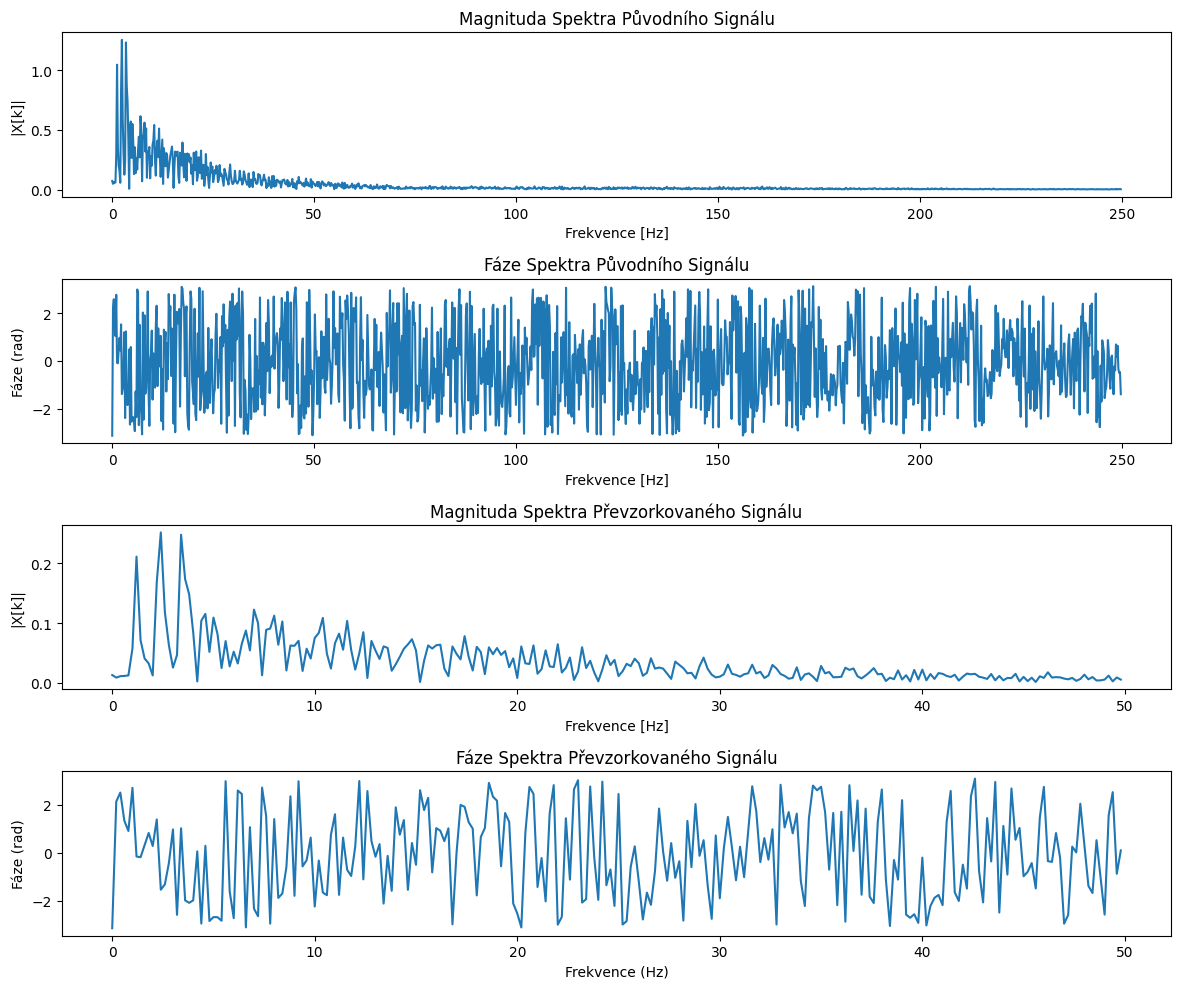

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
Duration = 5 # Signal Duration = 5s
OriginalSampleFreq = fs
ResampledSampleFreq = fs_new

StartingPoint = 0
# Preparation Of Original Signal Cutout
SamplingEndOrig = Duration * OriginalSampleFreq
SegmentOrig = SelectedSignal[StartingPoint:SamplingEndOrig]

# Preparaion Of Resampled Signal Cutout
SamplingEndResam = Duration * ResampledSampleFreq
SegmentResam = ResampledSignal[StartingPoint:SamplingEndResam]

### View In Time Domain ###
plt.figure(figsize=(12, 6))

TimeAxisOriginal = np.linspace(0,len(SelectedSignal)/ OriginalSampleFreq, len(SelectedSignal))
TimeAxisResampled = np.linspace(0,len(SegmentResam)/ ResampledSampleFreq, len(SegmentResam))
# Original Signal
plt.subplot(2, 1, 1)
plt.plot(TimeAxisOriginal,SegmentOrig, label='Original Signal', color='blue')
plt.title('5-sekundový úsek původního signálu')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda [mV]")
plt.legend()

# Resampled Signal
plt.subplot(2, 1, 2)
plt.plot(TimeAxisResampled,SegmentResam, label='Resampled Signal', color='red')
plt.title('5-sekundový úsek převzorkovaného signálu')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda [mV]")
plt.legend()

plt.tight_layout()
plt.show()

### View In Frequency Domain ###

# Calculation Of FFT For Both Cutouts
fft_orig = fft(SegmentOrig)
fft_resam = fft(SegmentResam)
N_orig = len(SegmentOrig)
N_resam = len(SegmentResam)

# Calculation Of Frequncies Of FFT
frequencies_orig = fftfreq(N_orig, 1 / OriginalSampleFreq)[:N_orig // 2]
frequencies_resam = fftfreq(N_resam, 1 / ResampledSampleFreq)[:N_resam // 2]

# Calculation Of Magnitude & Phase
magnitude_orig = np.abs(fft_orig)[:N_orig // 2]
phase_orig = np.angle(fft_orig)[:N_orig // 2]
magnitude_resam = np.abs(fft_resam)[:N_resam // 2]
phase_resam = np.angle(fft_resam)[:N_resam // 2]

### Plot Magnitude & Phase For Both Signals ###
plt.figure(figsize=(12, 10))

# Magnitude Of Origin Signal
plt.subplot(4, 1, 1)
plt.plot(frequencies_orig, magnitude_orig)
plt.title('Magnituda Spektra Původního Signálu')
plt.xlabel("Frekvence [Hz]")
plt.ylabel("|X[k]|")

# Phase Of Origin Signal
plt.subplot(4, 1, 2)
plt.plot(frequencies_orig, phase_orig)
plt.title('Fáze Spektra Původního Signálu')
plt.xlabel("Frekvence [Hz]")
plt.ylabel('Fáze (rad)')


# Magnitude Of Resampled Signal
plt.subplot(4, 1, 3)
plt.plot(frequencies_resam, magnitude_resam)
plt.title('Magnituda Spektra Převzorkovaného Signálu')
plt.xlabel("Frekvence [Hz]")
plt.ylabel("|X[k]|")

# Phase Of Resampled Signal
plt.subplot(4, 1, 4)
plt.plot(frequencies_resam, phase_resam)
plt.title('Fáze Spektra Převzorkovaného Signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Fáze (rad)')

plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

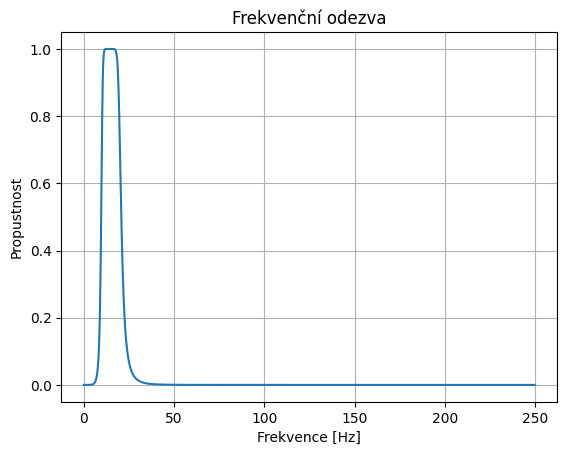

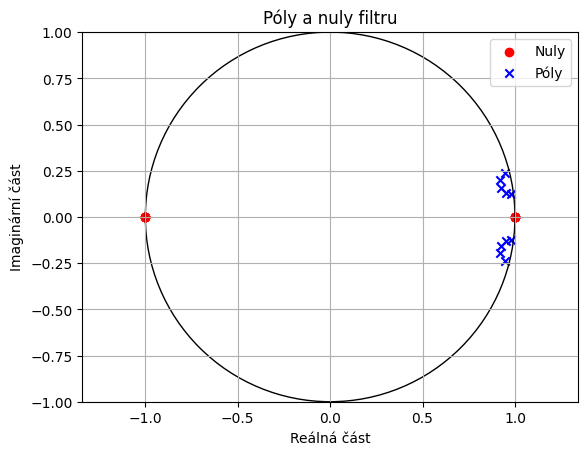

In [ ]:
# Zde napište váš kód
from scipy.signal import butter, freqz,tf2zpk
import numpy as np
import matplotlib.pyplot as plt


# LowPass Filter Params For 10-20Hz
LowCut      = 10   # Hz
HighCut     = 20   # Hz
Order       = 5

NyquistFrequency = fs / 2

# Normalized Low Cut
NormalizedLowCut = LowCut / NyquistFrequency
NormalizedHighCut = HighCut / NyquistFrequency

b_coefs, a_coefs = butter(Order,[NormalizedLowCut,NormalizedHighCut],btype='band')

# View Of Frequncy Impuls
w, h = freqz(b_coefs, a_coefs, worN=2000)
plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title('Frekvenční odezva')
plt.xlabel('Frekvence [Hz]')
plt.ylabel('Propustnost')
plt.grid()
plt.show()

# Get Poles and Zeroes From Filter
z, p, k = tf2zpk(b_coefs, a_coefs)
# Plot zeros
plt.scatter(np.real(z), np.imag(z), marker='o', color='red', label='Nuly')
# Plot poles
plt.scatter(np.real(p), np.imag(p), marker='x', color='blue', label='Póly')
# Unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gcf().gca().add_artist(circle)

plt.title('Póly a nuly filtru')
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.grid()
plt.axis('equal')
# Setting the axis limits so that the whole circle is visible
ax_lim = np.max(np.ceil(np.abs(p)))  # We take the maximum of the absolute values of the poles
plt.xlim([-ax_lim, ax_lim])
plt.ylim([-ax_lim, ax_lim])
plt.legend()
plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


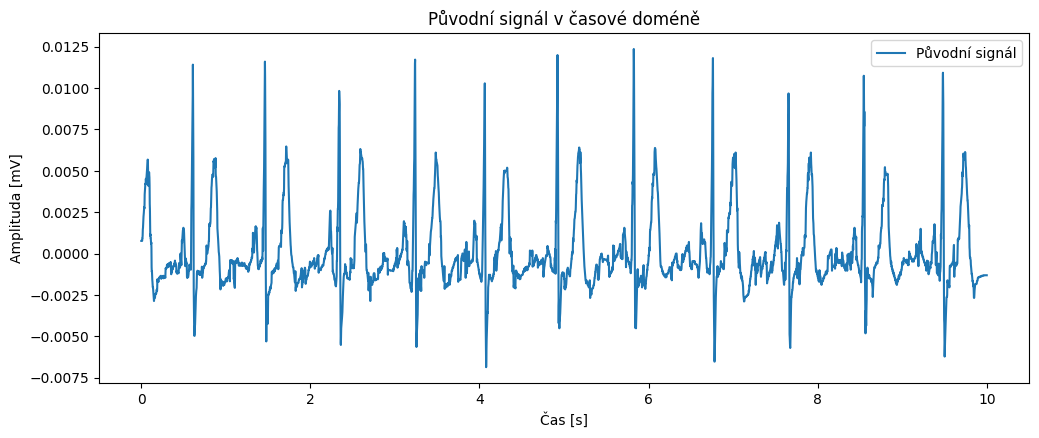

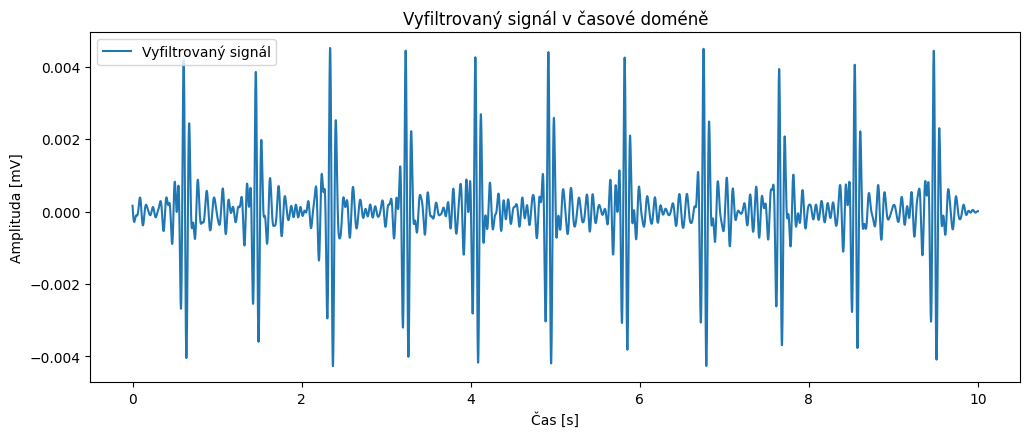

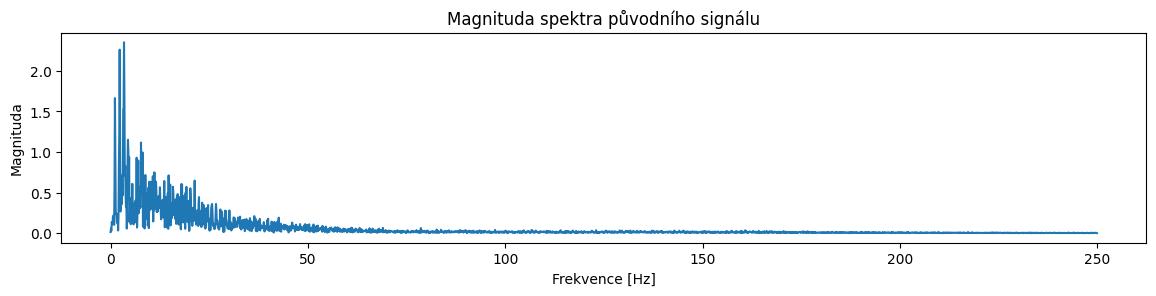

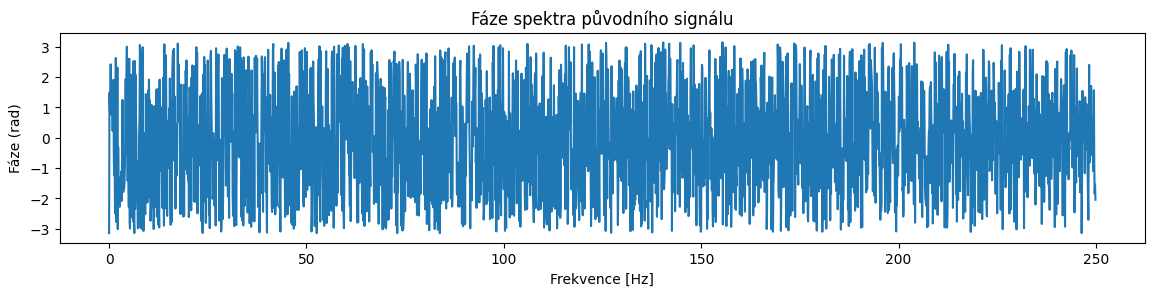

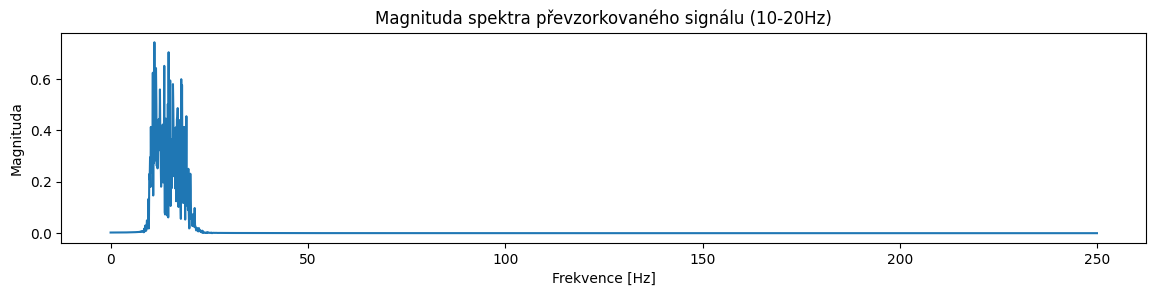

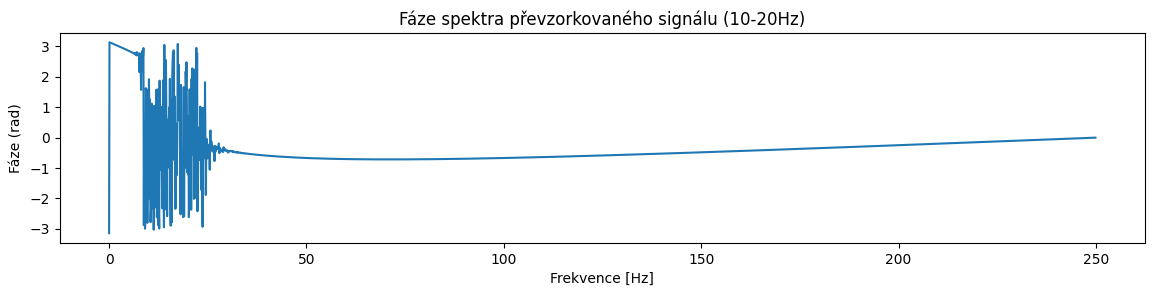

In [ ]:
# Zde napište váš kód
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import filtfilt, fftconvolve
from scipy.fft import fft, fftfreq

# Filter Application
filtered_signal = filtfilt(b_coefs, a_coefs, x)

TimeAxis = np.linspace(0,len(x)/ fs, len(x))

# Plot The Origin and Fitered Signal
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(TimeAxis ,x, label='Původní signál')
plt.title('Původní signál v časové doméně')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda [mV]")
plt.legend()
plt.show()

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(TimeAxis,filtered_signal, label='Vyfiltrovaný signál')
plt.title('Vyfiltrovaný signál v časové doméně')
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda [mV]")
plt.legend()
plt.show()

### View In Frequency Domain ###
OriginHalfIndex = len(x) // 2
OriginFFT = fft(x)
# Frequency corresponding to DFT bins
OriginFreqs = np.fft.fftfreq(len(x), 1 / fs)
# Calculation of magnitude and phase
OriginMagnitude = np.abs(OriginFFT)
OriginPhase = np.angle(OriginFFT)

# Magnitude Of Origin Signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(OriginFreqs[:OriginHalfIndex], OriginMagnitude[:OriginHalfIndex])
plt.title('Magnituda spektra původního signálu')
plt.xlabel("Frekvence [Hz]")
plt.ylabel('Magnituda')
plt.show()

# Phase Of Origin Signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 2)
plt.plot(OriginFreqs[:OriginHalfIndex], OriginPhase[:OriginHalfIndex])
plt.title('Fáze spektra původního signálu')
plt.xlabel("Frekvence [Hz]")
plt.ylabel('Fáze (rad)')
plt.show()

### Resampled Signal 10-20Hz ###
ResHalfIndex = len(filtered_signal) // 2
ResFFT = fft(filtered_signal)
# Frequency corresponding to DFT bins
ResFreqs = np.fft.fftfreq(len(filtered_signal), 1 / fs)
# Calculation of magnitude and phase
ResMagnitude = np.abs(ResFFT)
ResPhase = np.angle(ResFFT)

# Magnitude Of Resampled Signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.plot(ResFreqs[:ResHalfIndex], ResMagnitude[:ResHalfIndex])
plt.title('Magnituda spektra převzorkovaného signálu (10-20Hz)')
plt.xlabel("Frekvence [Hz]")
plt.ylabel('Magnituda')
plt.show()

# Phase Of Resampled Signal
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 2)
plt.plot(ResFreqs[:ResHalfIndex], ResPhase[:ResHalfIndex])
plt.title('Fáze spektra převzorkovaného signálu (10-20Hz)')
plt.xlabel("Frekvence [Hz]")
plt.ylabel('Fáze (rad)')
plt.show()



  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



Nefiltrovaný signál obsahuje přirozeně větší rozsah frekvencím zaso filtrovaný obsahuje pouze frekvence v rozmezí 10 - 20 Hz. Maximálni posun je max. o polovinu délky filtru.



### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

Příklad zakreslené detekce (před odevzdáním smažte):

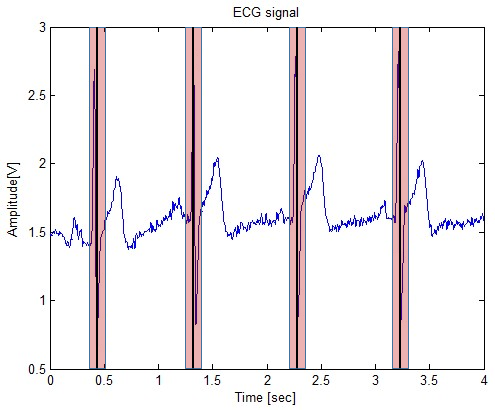

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

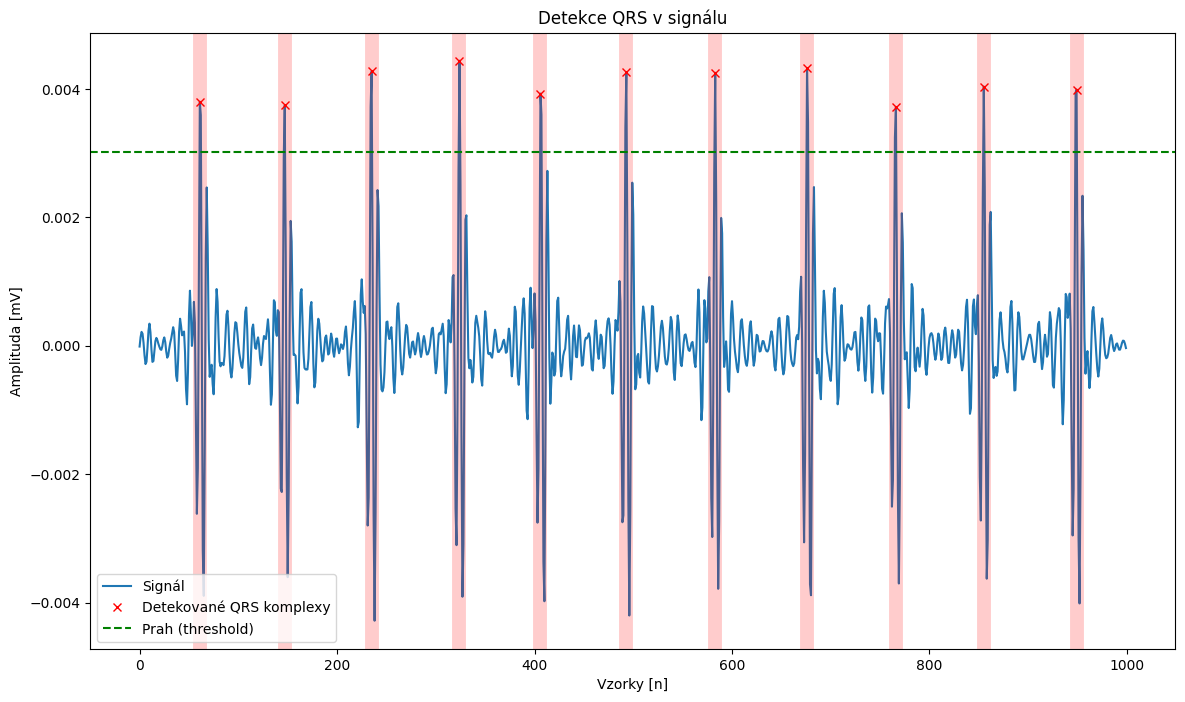

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.signal as signal

# LowPass Filter Params For 10-20Hz
LowCut      = 10   # Hz
HighCut     = 20   # Hz
Order       = 5

# Prepaire Resampled Filtrated Signal
NyquistFrequency = fs_new / 2
LowCut = LowCut/NyquistFrequency
HighCut =HighCut/NyquistFrequency
b, a = signal.butter(order, [LowCut, HighCut], btype='band')

resampled_filtered_signal = signal.filtfilt(b, a, ResampledSignal)



# Find QRS
QRS_sample = resampled_filtered_signal[0:SamplingEndResam]
# Set Max Amplitude
max_amplitude = np.max(np.abs(QRS_sample))

# Set Threshold For QRS
threshold_percentage = 0.68  # 68% From Maximal Amplitude
threshold = threshold_percentage * max_amplitude

# Detection Of QRS Komplexes
QRS_peaks, _ = find_peaks(resampled_filtered_signal, height=threshold)
# For QRS Peaks Indexes
# print(QRS_peaks)

# Plot Of Signal With Highlighted QRSs
plt.figure(figsize=(14, 8))
plt.plot(resampled_filtered_signal, label='Signál')
plt.plot(QRS_peaks, resampled_filtered_signal[QRS_peaks], 'rx', label='Detekované QRS komplexy')
for Peak in QRS_peaks:
    plt.axvline(x=Peak, color='red', alpha=0.2, linewidth=10)
plt.axhline(y=threshold, color='g', linestyle='--', label='Prah (threshold)')
plt.title('Detekce QRS v signálu')
plt.xlabel('Vzorky [n]')
plt.ylabel('Amplituda [mV]')
plt.legend()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

[62, 147, 235, 324, 325, 407, 493, 583, 584, 677, 766, 855, 856, 949]


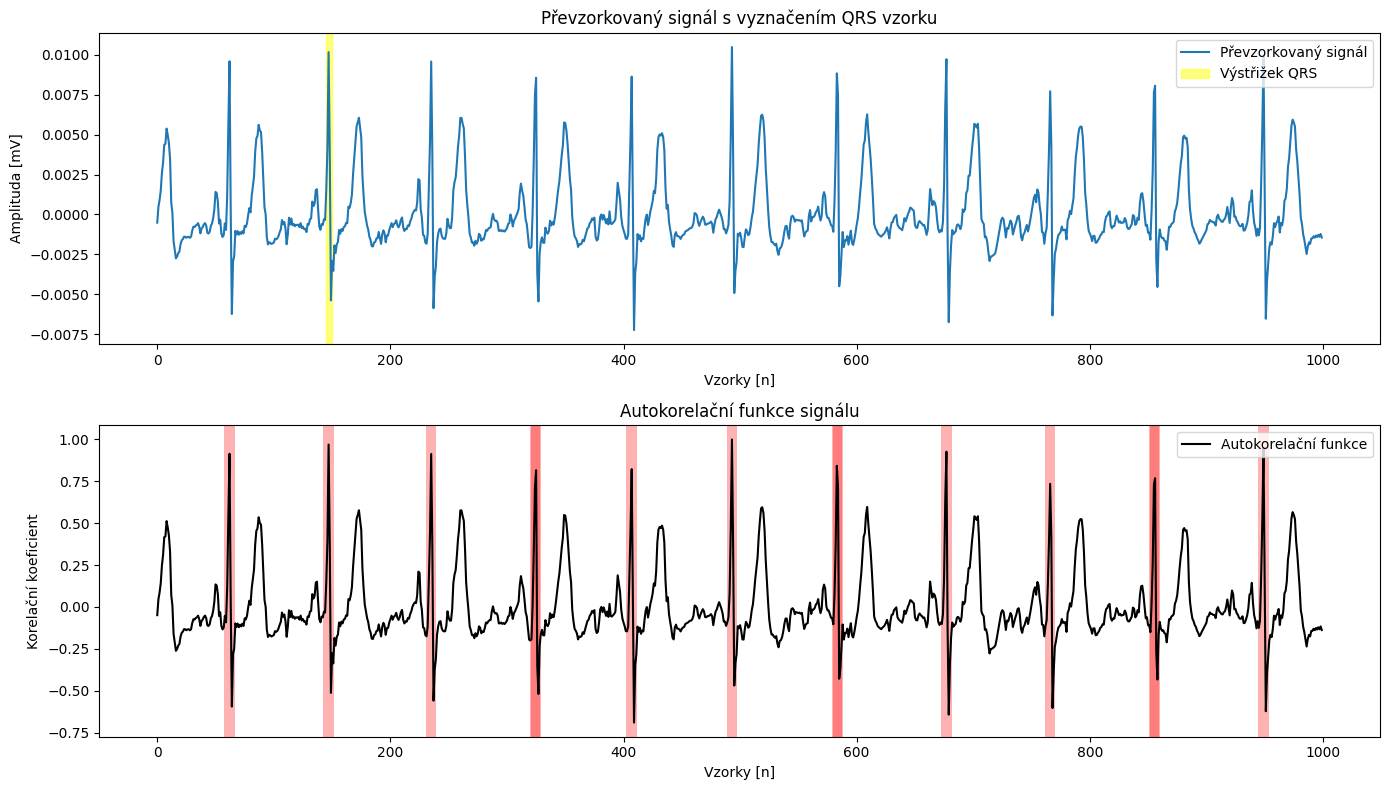

In [ ]:
# Zde napište váš kód
import numpy as np
import matplotlib.pyplot as plt

# TODO: Ktery signal je prevzorkovany a nefiltrovany
# Clip Od Sample Of QRS Clip From Signal
# Used
QrsSample = np.max(ResampledSignal)
QrsMax = np.where(ResampledSignal == QrsSample)[0]

# Autocoleration of Signal With QRS Clip
AutoCorelation = np.correlate(ResampledSignal,QrsMax,mode='same')


# Normalization -> For Better Detection
AutoCorelation = AutoCorelation / np.max(AutoCorelation)

# Plot Of Signal And Autocorelation
plt.figure(figsize=(14, 8))

# Origin Signal
plt.subplot(2, 1, 1)
plt.plot(ResampledSignal, label='Převzorkovaný signál')
plt.title('Převzorkovaný signál s vyznačením QRS vzorku')
plt.axvspan(145, 150, color='yellow', alpha=0.5, label='Výstřižek QRS')
plt.xlabel('Vzorky [n]')
plt.ylabel('Amplituda [mV]')
plt.legend()


# Autorelation Function
plt.subplot(2, 1, 2)
plt.plot(AutoCorelation, label='Autokorelační funkce', color='black')
plt.title('Autokorelační funkce signálu')
plt.xlabel('Vzorky [n]')
plt.ylabel('Korelační koeficient')
plt.legend()


QrsFromResampled = []
# Vykreslení červených obdélníků pro hodnoty autokorelace vyšší než 0.9
for i, value in enumerate(AutoCorelation):
    if value > 0.7:
        plt.axvspan(i-4.5, i+4.5, ymin=0,  ymax=1, facecolor='red', alpha=0.3)
        QrsFromResampled.append(i)

print(QrsFromResampled)

plt.tight_layout()
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

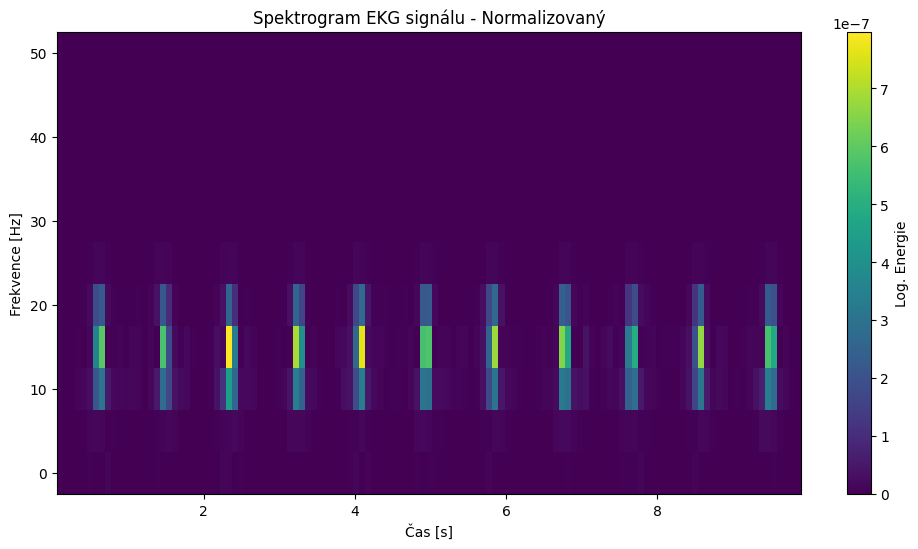

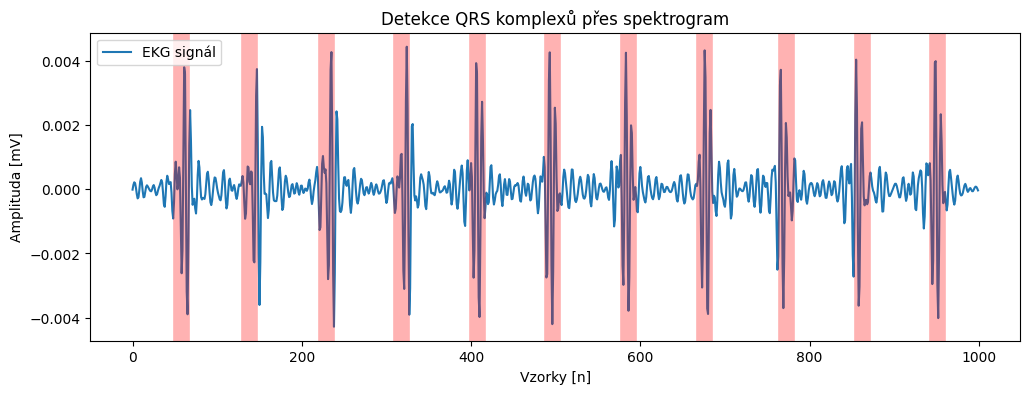

In [ ]:
# Zde napište váš kód
from scipy.signal import spectrogram
import numpy as np
import matplotlib.pyplot as plt

# LowPass Filter Params For 10-20Hz
LowCut      = 10   # Hz
HighCut     = 20   # Hz
Order       = 5

# Prepaire Resampled Filtrated Signal
NyquistFrequency = fs_new / 2
LowCut = LowCut/NyquistFrequency
HighCut =HighCut/NyquistFrequency
b, a = signal.butter(order, [LowCut, HighCut], btype='band')

resampled_filtered_signal = signal.filtfilt(b, a, ResampledSignal)


# Params For Spectrogram
HopSize = int(0.12 * fs_new)
WindowLenght = int(0.2 * fs_new)

# Compute Spectrogram
frequencies, times, Sxx = spectrogram(resampled_filtered_signal, fs=fs_new, window='hann', nperseg=WindowLenght, noverlap=HopSize)
# Normalization
SxxNormalized = np.log(Sxx + 1)
# Plot The Spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, SxxNormalized, shading='auto')
plt.ylabel('Frekvence [Hz]')
plt.xlabel('Čas [s]')
plt.title('Spektrogram EKG signálu - Normalizovaný')
plt.colorbar(label='Log. Energie')
plt.show()

# Compute The Sums For Every Bin
Sum = np.sum(Sxx, axis=0)
# Detection Of QRS By Threshold
Treshold = np.max(Sum) * 0.25
QrsPeaks, _ = find_peaks(Sum, height=Treshold)
# Scaling
ScaleFactor = 123 / 1000
QrsPeaksS = np.round(QrsPeaks / ScaleFactor , decimals=0)

# Plot EKG Singal And QRS Komplexes
plt.figure(figsize=(12,4))
plt.plot(resampled_filtered_signal, label='EKG signál')

for QrsPeak in QrsPeaksS:
    plt.axvline(x=QrsPeak, color='r', alpha=0.3, linewidth=12)

plt.xlabel('Vzorky [n]')
plt.ylabel('Amplituda [mV]')
plt.title('Detekce QRS komplexů přes spektrogram')
plt.legend()
plt.show()


b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

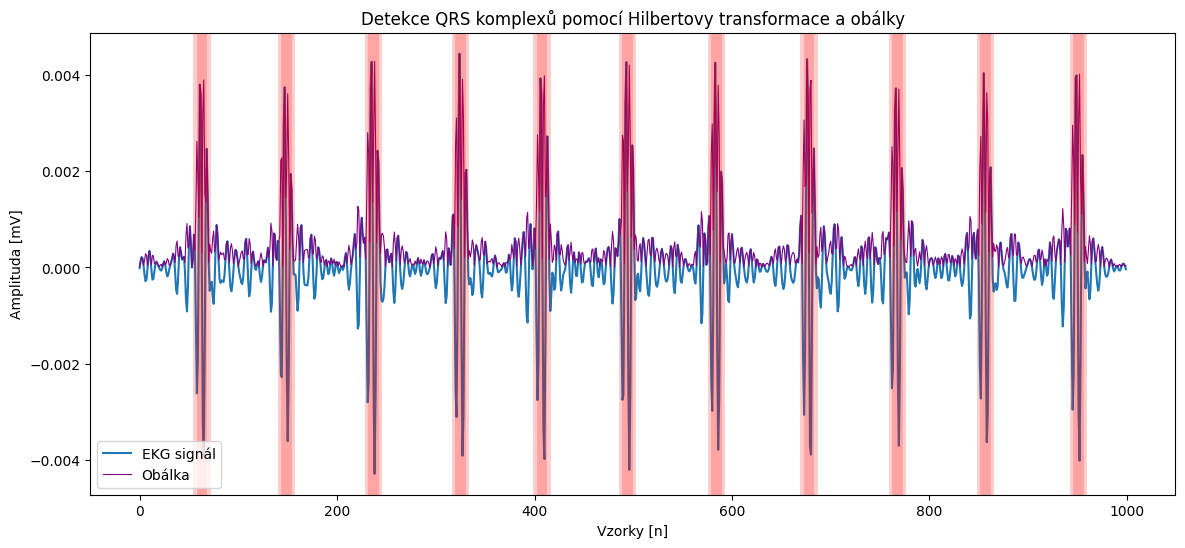

In [ ]:
# Zde napište váš kód
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Compute DFT By Fast Fourier Transform
FilteredSignalFFT = np.fft.fft(resampled_filtered_signal)
# Absolute Value
AbsoluteValFilteredSignalFFT = np.abs(FilteredSignalFFT)
# Prepare Exponential
Exponential =  np.exp(1j * np.angle(FilteredSignalFFT))

Envelope = np.fft.ifft(AbsoluteValFilteredSignalFFT * Exponential)

# Detection QRS By Envelope
EnvelopeAbs = np.abs(Envelope)
Treshold = 0.75 * np.max(EnvelopeAbs)
QrsPeaks, _ = find_peaks(EnvelopeAbs, height=Treshold)

### Plot ###
plt.figure(figsize=(14,6))
plt.plot(resampled_filtered_signal, label='EKG signál')
plt.plot(EnvelopeAbs, label='Obálka', color='purple', linewidth=0.8)
for Peak in QrsPeaks:
    plt.axvline(x=Peak, color='red', alpha=0.2, linewidth=10)
plt.title('Detekce QRS komplexů pomocí Hilbertovy transformace a obálky')
plt.xlabel('Vzorky [n]')
plt.ylabel('Amplituda [mV]')
plt.legend()
plt.show()


c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Pokud použíjeme metodu detekce QRS založenou na prahování a hledáme vrcholy nad určitou amplitudou, otočení signálu může způsobit, že vrcholy, které byly původně nad prahem, nyní budou pod ním a naopak. Tedy pokud nezohledňujeme obě kladné a záporné amplitudy, může být detekce nesprávná.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

Mělo by to vypadat přibližně takto (před odevzdáním smažte):
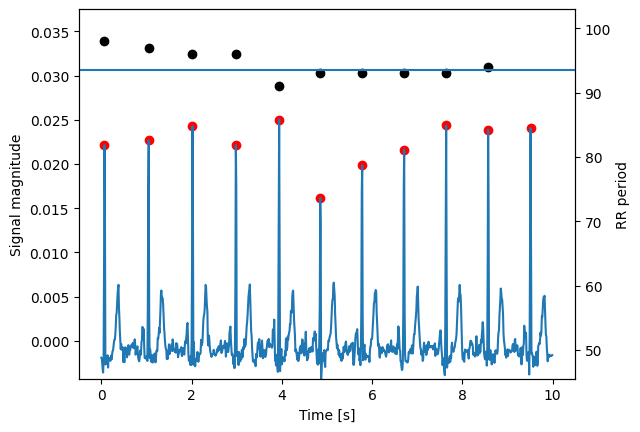

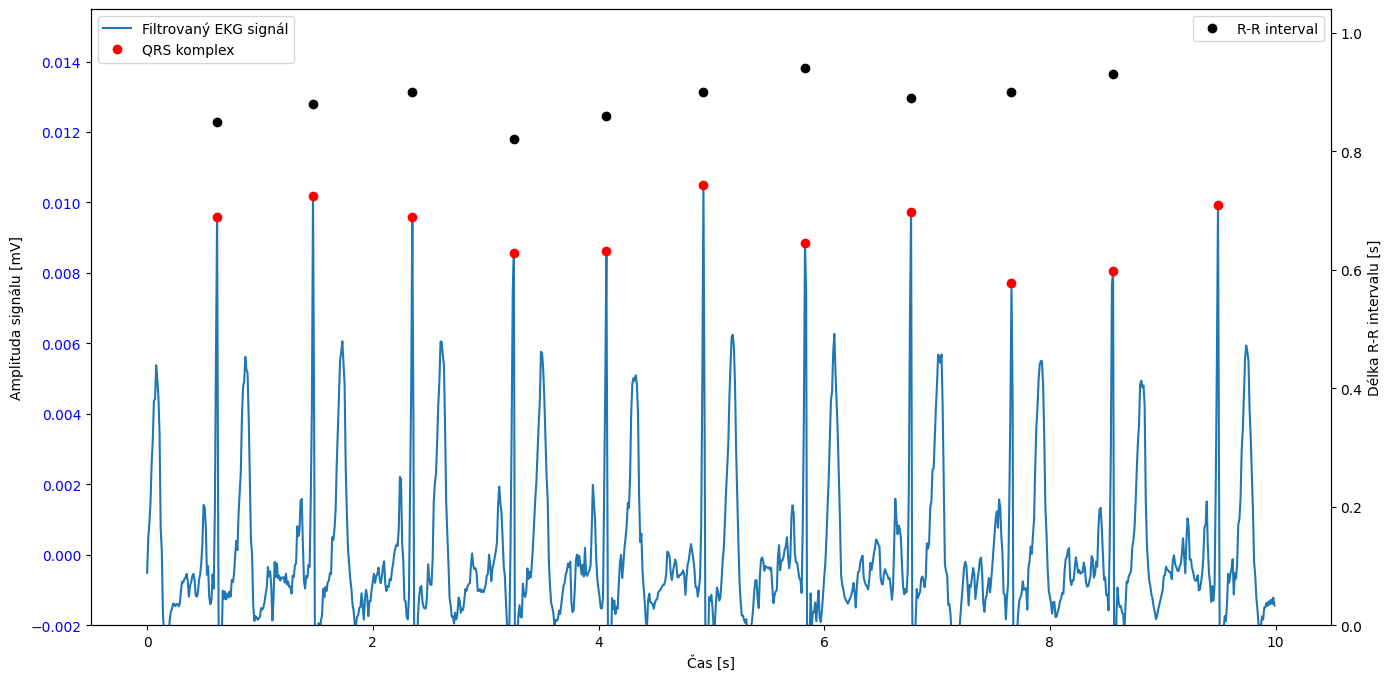

In [ ]:
# Zde napište váš kód
import numpy as np
import matplotlib.pyplot as plt

PeaksOfQRS = [302, 729, 1168, 1615, 2027, 2459, 2910, 3376, 3823, 4270, 4738]

# EKG signal data and QRS complex indexes
PeaksOfQRS = np.array([62, 147, 235, 325, 407, 493, 583, 677, 766, 856, 949])

# Obtaining and maximum values for the y-axis setting
max_signal = np.max(ResampledSignal)  # nejvyšší hodnota signálu


# Calculation of R-R Intervals And Positions For Plotting
RR_Intervals = np.diff(PeaksOfQRS) / fs_new  # Intervals Between QRS In Secs
RR_x_positions = PeaksOfQRS[:-1] / fs_new    # Time Positions For Plotting R-R Intervals In Secs

# Plotting Of EKG Signal
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(np.arange(len(ResampledSignal)) / fs_new, ResampledSignal, label='Filtrovaný EKG signál')
ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Amplituda signálu [mV]')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(-0.002, max_signal+0.005)

# Plotting of QRS Komplexes (As Black Dots)
for i, qrs_index in enumerate(PeaksOfQRS):
    ax1.plot(qrs_index / fs_new, ResampledSignal[qrs_index], 'ro', label='QRS komplex' if i == 0 else "")


# Adding a Secondary Y-Axis For R-R Intervals
ax2 = ax1.twinx()
ax2.set_ylabel('Délka R-R intervalu [s]', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Plotting R-R Intervals (As Red Dots)
for i, rr in enumerate(RR_Intervals):
    ax2.plot(RR_x_positions[i], rr, 'ko', label='R-R interval' if i == 0 else "")

# Range Setting For The Secondary Y-Axis According To R-R Interval Values
ax2.set_ylim([0, max(RR_Intervals) + 0.1])


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show Me The Graph!
plt.show()

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

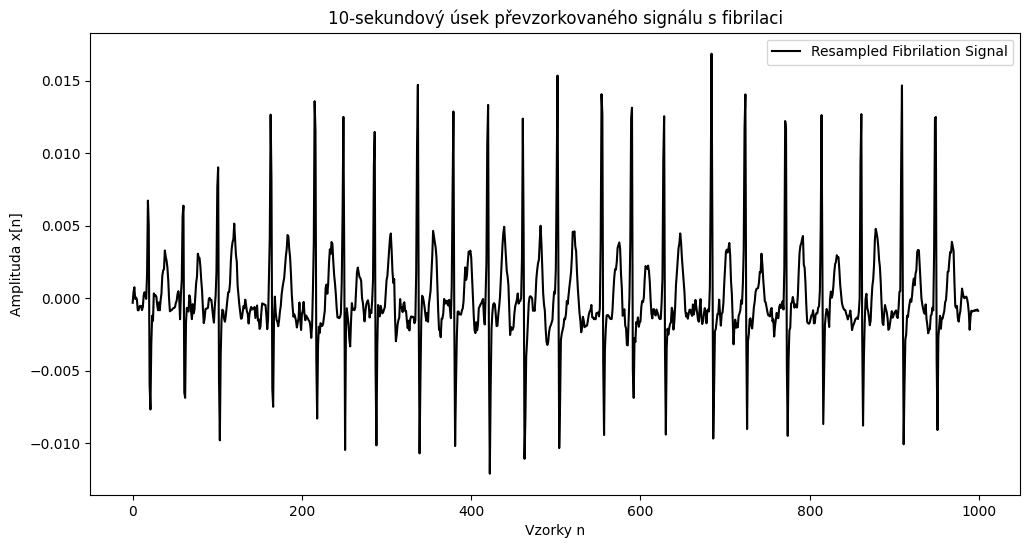

[163, 215, 337, 379, 420, 502, 554, 590, 684, 724, 861, 909]


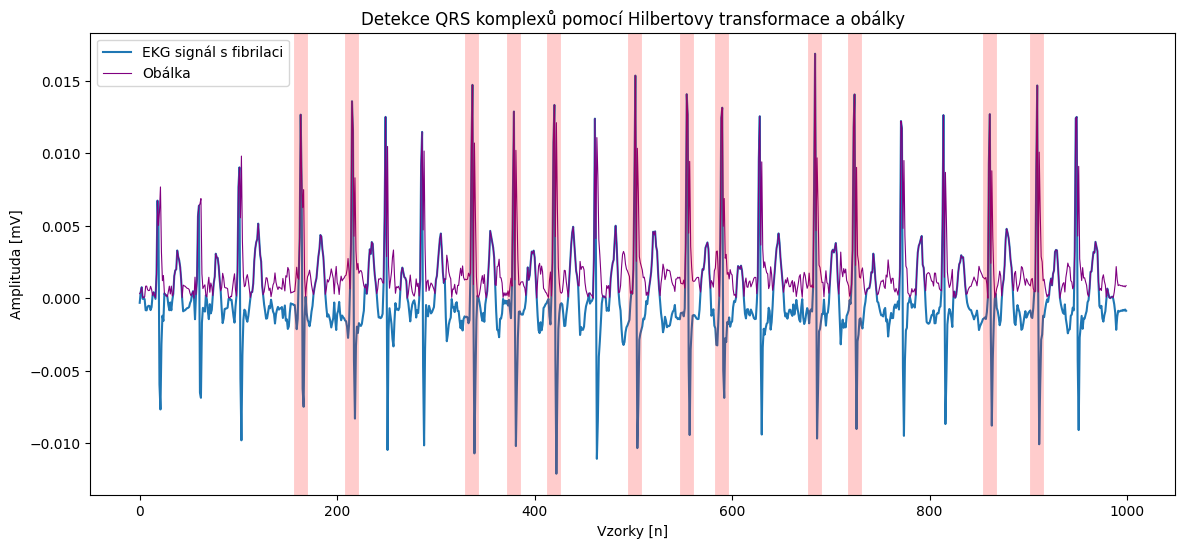

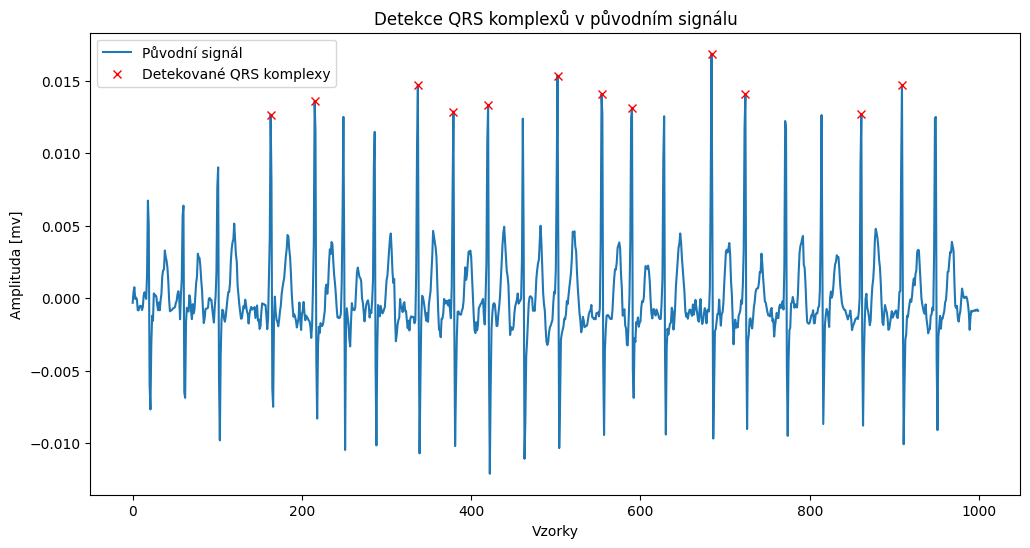

QRS Peaks Indexes: [163 215 337 379 420 502 554 590 684 724 861 909]


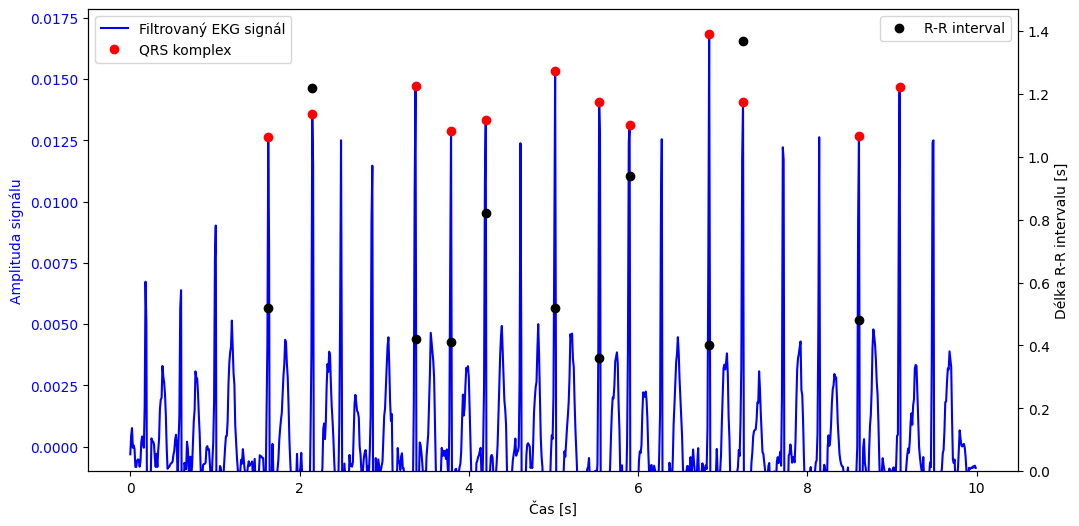

In [ ]:
# Zde napište váš kód
from scipy.signal import butter, lfilter, resample,find_peaks
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Read Signal FIS.wav
x_fib, fs_fib = sf.read("FIB.wav")

# Resampling Of FIS Signal

# Parameters Set
NyqFreq = fs_fib / 2
CutOffFreq = 50       # 50 Hz Nyquist Frequency (Half Of New Sample Frequency)
order = 5             # Filter Order

# Aplication of AntiAlising Filter
b_fib, a_fib = butter(order, CutOffFreq/ NyqFreq)
FIS_FilteredSignal = lfilter(b_fib, a_fib, x_fib)

# Resampling of Original Signal
new_fs_fib = 100  # Nová vzorkovací frekvence
FIB_ResampledSignal = resample(FIS_FilteredSignal, int(len(x_fib) * new_fs_fib / fs_fib))

# View Of Resamplet Fibrilation Signal
DurationFib = 10
SamplingStartResamFib = 0
SamplingEndResamFib = DurationFib * new_fs_fib
SegmentResamFib = FIB_ResampledSignal[SamplingStartResamFib:SamplingEndResamFib]

# Resampled Signal
plt.figure(figsize=(12, 6))
plt.plot(SegmentResamFib, label='Resampled Fibrilation Signal', color='black')
plt.title('10-sekundový úsek převzorkovaného signálu s fibrilaci')
plt.xlabel('Vzorky n')
plt.ylabel('Amplituda x[n]')
plt.legend()
plt.show()

# Hilbert Transformation With Envelope Computation
signal_fft = fft(FIB_ResampledSignal)
abs_signal_fft = np.abs(signal_fft)
Exponential =  np.exp(1j * np.angle(signal_fft))
FibEnvelope = np.fft.ifft(abs_signal_fft  * Exponential)
FibEnvelopeAbs = np.abs(FibEnvelope)
TresholdFib = 0.75 * np.max(FibEnvelopeAbs)
QrsPeaks, _ = find_peaks(FibEnvelopeAbs, height=TresholdFib)

IndexesQRS = []

plt.figure(figsize=(14,6))
plt.plot(FIB_ResampledSignal, label='EKG signál s fibrilaci')
plt.plot(FibEnvelopeAbs, label='Obálka', color='purple', linewidth=0.8)
for Peak in QrsPeaks:
    plt.axvline(x=Peak, color='red', alpha=0.2, linewidth=10)
    IndexesQRS.append(Peak)

print(IndexesQRS)
plt.title('Detekce QRS komplexů pomocí Hilbertovy transformace a obálky')
plt.xlabel('Vzorky [n]')
plt.ylabel('Amplituda [mV]')
plt.legend()
plt.show()

# Plotting of the original signal and detected QRS complexes
plt.figure(figsize=(12, 6))
plt.plot(FIB_ResampledSignal, label='Původní signál')
plt.plot(QrsPeaks, FIB_ResampledSignal[QrsPeaks], 'x', label='Detekované QRS komplexy', color='red')
plt.title('Detekce QRS komplexů v původním signálu')
plt.xlabel('Vzorky')
plt.ylabel('Amplituda [mv]')
plt.legend()
plt.show()

print(f"QRS Peaks Indexes: {QrsPeaks}")
# Data EKG signálu a indexy QRS komplexů
FibPeaksOfQRS = np.array(QrsPeaks)

# Získání a maximální hodnoty pro nastavení osy y
fib_max_signal = np.max(FIB_ResampledSignal)  # nejvyšší hodnota signálu


# Výpočet R-R intervalů a pozic pro vykreslení
FIB_RR_Intervals = np.diff(FibPeaksOfQRS) / new_fs_fib  # Intervals Between QRS In Secs
FIB_RR_x_positions = FibPeaksOfQRS[:-1] / new_fs_fib    # Time positions for plotting R-R intervals (in seconds)

# Plot of EKG Signal
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(np.arange(len(FIB_ResampledSignal)) / new_fs_fib, FIB_ResampledSignal, label='Filtrovaný EKG signál', color='blue')
ax1.set_xlabel('Čas [s]')
ax1.set_ylabel('Amplituda signálu', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(-0.001, fib_max_signal+0.001)

# Plot QRS complexes as red dots
for i, qrs_index in enumerate(FibPeaksOfQRS):
    ax1.plot(qrs_index / new_fs_fib, FIB_ResampledSignal[qrs_index], 'ro', label='QRS komplex' if i == 0 else "")


# dding a secondary y-axis for R-R intervals
ax2 = ax1.twinx()
ax2.set_ylabel('Délka R-R intervalu [s]', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# R-R intervals plot as black dots
for i, rr in enumerate(FIB_RR_Intervals):
    ax2.plot(FIB_RR_x_positions[i], rr, 'ko', label='R-R interval' if i == 0 else "")

# Range setting for the secondary y-axis according to R-R interval values
ax2.set_ylim([0, max(FIB_RR_Intervals) + 0.1])

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

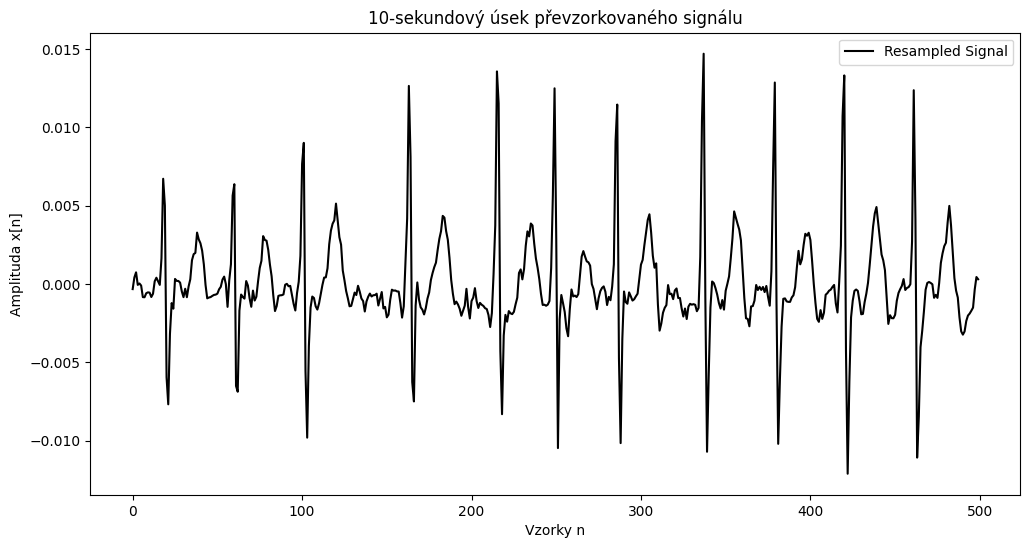

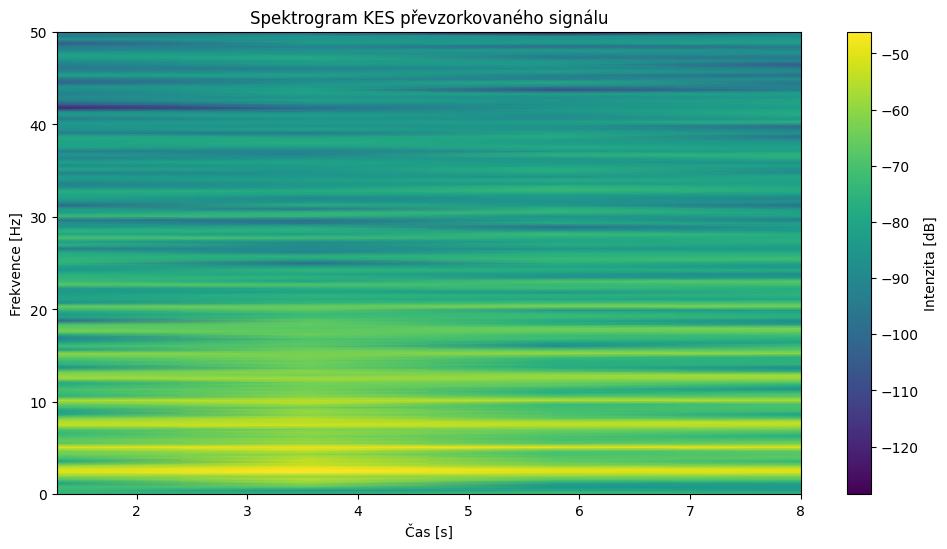

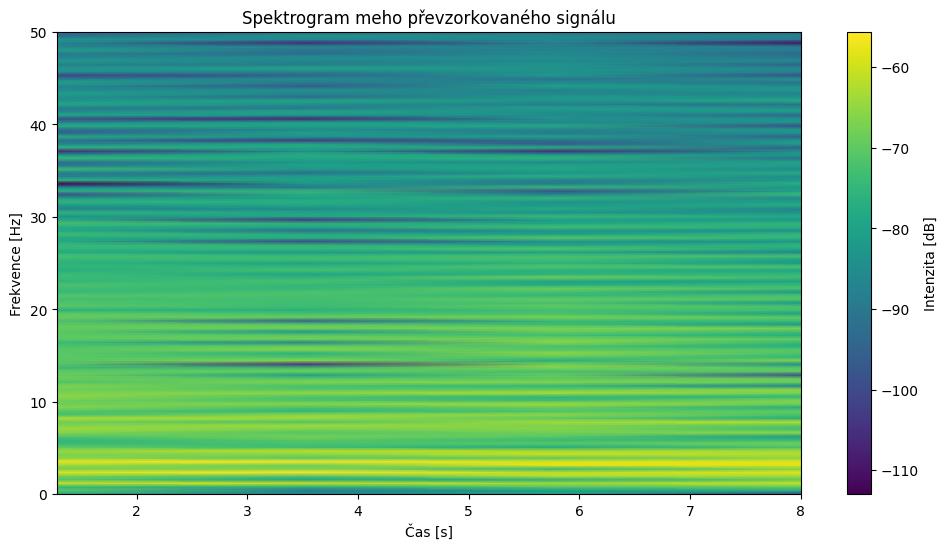

In [ ]:
# Zde napište váš kód
from scipy.signal import butter, lfilter, resample,find_peaks,spectrogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
# Zde napište váš kód

# Read Signal FIS.wav
x_kes, fs_kes = sf.read("KES.wav")

# Parameters Set
NyqFreq = fs_kes / 2
CutOffFreq = 50       # 50 Hz Nyquist Frequency (Half Of New Sample Frequency)
order = 5             # Filter Order

# Aplication of AntiAlising Filter
b_kes, a_kes = butter(order, CutOffFreq/ NyqFreq)
KES_FilteredSignal = lfilter(b_kes, a_kes, x_kes)

# Resampling of Original Signal
new_fs_kes = 100  # Nová vzorkovací frekvence
KES_ResampledSignal = resample(KES_FilteredSignal, int(len(x_kes) * new_fs_kes / fs_kes))

# View Of Resamplet Fibrilation Signal
KES_Duration = 5
SamplingEndResamKes = KES_Duration * new_fs_kes
SegmentResamKes = FIB_ResampledSignal[0:SamplingEndResamKes]

# Resampled Signal
plt.figure(figsize=(12, 6))
plt.plot(SegmentResamKes, label='Resampled Signal', color='black')
plt.title('10-sekundový úsek převzorkovaného signálu')
plt.xlabel('Vzorky n')
plt.ylabel('Amplituda x[n]')
plt.legend()

# Compute Spectrogram
KES_frequencies, KES_times, KES_Sxx = spectrogram(KES_ResampledSignal, fs=new_fs_kes)

# Plot The Spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(KES_times, KES_frequencies, 10 * np.log10(KES_Sxx), shading='gouraud')
plt.ylabel('Frekvence [Hz]')
plt.xlabel('Čas [s]')
plt.title('Spektrogram KES převzorkovaného signálu')
plt.colorbar(label='Intenzita [dB]')
plt.show()

# My Signal Resampled Signal Spectrogram
MY_frequencies, MY_times, MY_Sxx = spectrogram(ResampledSignal, fs=ResampledSampleFreq)

plt.figure(figsize=(12, 6))
plt.pcolormesh(MY_times, MY_frequencies, 10 * np.log10(MY_Sxx), shading='gouraud')
plt.ylabel('Frekvence [Hz]')
plt.xlabel('Čas [s]')
plt.title('Spektrogram meho převzorkovaného signálu')
plt.colorbar(label='Intenzita [dB]')
plt.show()
